# Overview

The objective of this project is to understand and predict the emotion of people from facial images. We will build a system to identify the key facial points in an image as well as predict the emotion in that image. 


Source: https://www.kaggle.com/competitions/facial-keypoints-detection/data

Source: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# FACIAL KEY-POINT DETECTION

## Data Inspection and Exploration

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


The data contains the x-y coordinates of various key facial points. We will get a better understanding of these coordinates once we plot them. However, before that we need to convert the Image column to a numpy array in order to represent the pixel values of an image

In [6]:
# Checking for the number of pixel values in one image
len(df.Image[0].split(' '))

9216

In [7]:
np.fromstring(df.Image[0], sep=' ')

array([238., 236., 237., ...,  70.,  75.,  90.])

In [8]:
# Converting the Image column to numpy array and respahing it to (96,96)

df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, sep=' ').reshape(96,96))

In [9]:
df.Image[0].shape

(96, 96)

We have converted the Image column to represent images with (96,96) shape

## Image Visualization

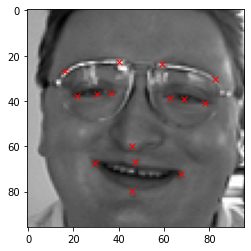

In [12]:
i = np.random.randint(1, len(df))

plt.imshow(df.Image[i], cmap='gray')
for j in range(1,31,2):
    plt.plot(df.iloc[i][j-1],df.iloc[i][j], 'rx')

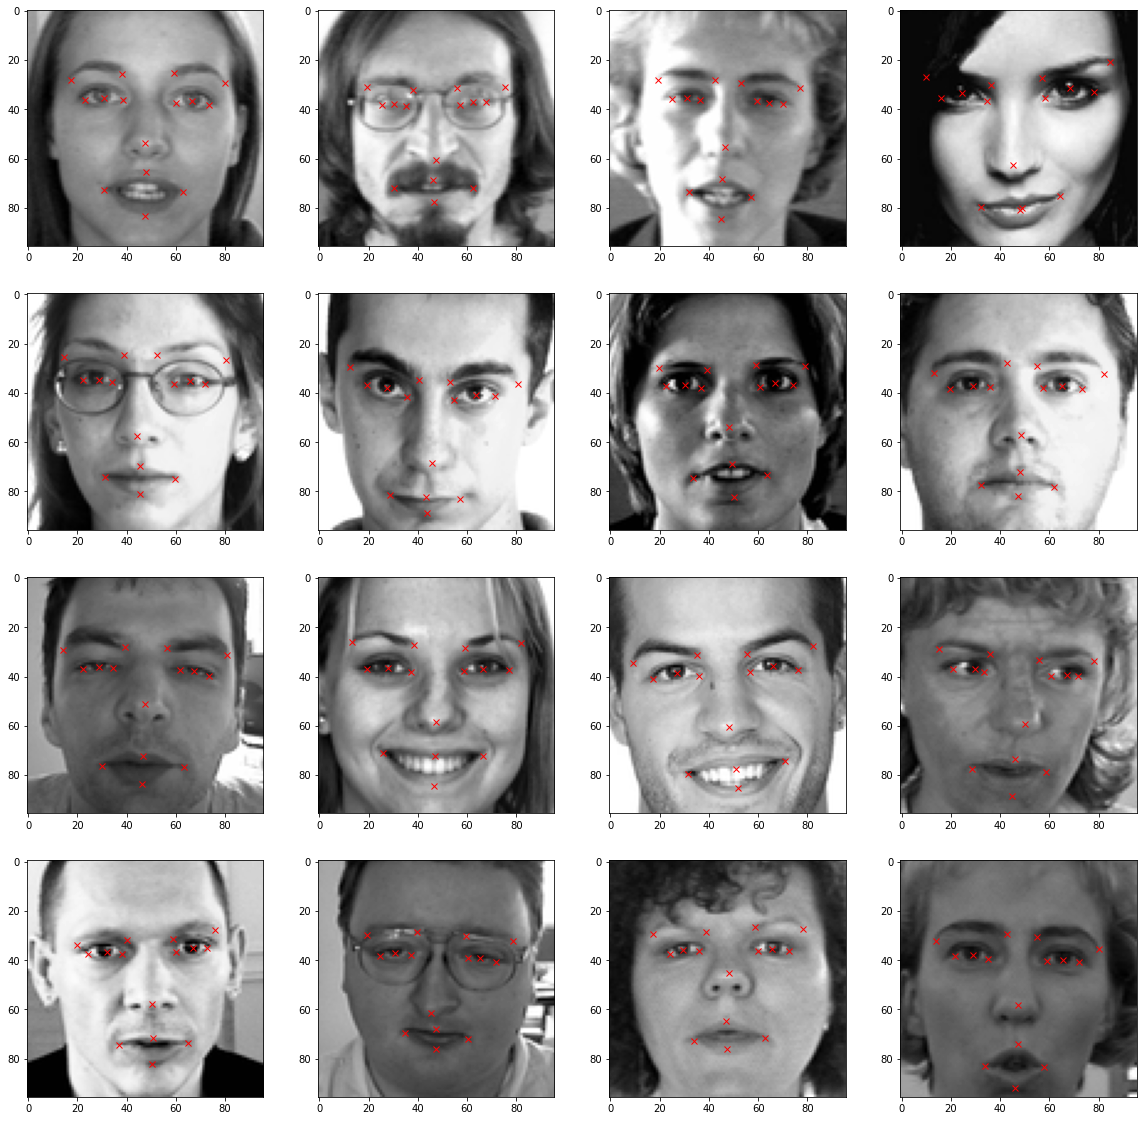

In [13]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for j in range(16):
    i = random.randint(1,len(df))
    ax = fig.add_subplot(4, 4, j + 1)    
    image = plt.imshow(df['Image'][i],cmap='gray')
    for j in range(1,31,2):
        plt.plot(df.iloc[i][j-1], df.iloc[i][j], 'rx')

## Data Augmentation

We will perform horizontal flip and increase the brightness of the images to perform image augmentation

In [15]:
# Creating a copy of the df

df_copy = df.copy()

In [16]:
# List of columns containing the x and y coordinates of the key points

cols = df_copy.columns[:-1]
cols

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [17]:
# Horizontal flip

df_copy['Image'] = df_copy['Image'].apply(lambda x: np.flip(x, axis=1))

Since we are flipping the image horizantally, the y coordinates will be the same as original. Only x coordiante values would change. We will subtract our initial x-coordinate values from 96 (width of the image)

In [20]:
for i in range(len(cols)):
    if i%2==0:
        df_copy[cols[i]] = df_copy[cols[i]].apply(lambda x: 96. - x )

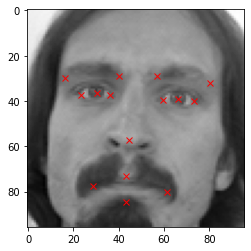

In [18]:
#Original image
plt.imshow(df['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(df.iloc[0][j-1], df.iloc[0][j], 'rx')

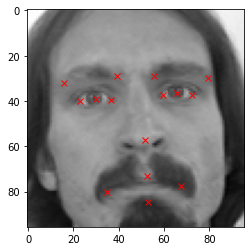

In [21]:
# Horizontally flipped image
plt.imshow(df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(df_copy.iloc[0][j-1], df_copy.iloc[0][j], 'rx')

In [22]:
# Concatenating original dataframe with the augmneted dataframe
augmented_df = pd.concat([df,df_copy])
augmented_df.shape

We will randomly increase the brightness by multipling pixel values by random values between 1 and 2. However, we also must make sure that no pixel value becomes greater than 255. So we will clip the values between 0 and 255.

Following a similar process, we will also decrease the brightness by multiplyting the pixel values with random values between 0 and 1

In [26]:
import random

# Increasing brightness

df_copy = df.copy()
df_copy['Image'] = df['Image'].apply(lambda x:np.clip(random.uniform(1, 2)* x,0.0, 255.0))
augmented_df = pd.concat([df,df_copy])
augmented_df.shape

(6420, 31)

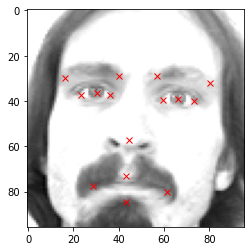

In [27]:
# Image with increased brightness

plt.imshow(df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(df_copy.iloc[0][j-1], df_copy.iloc[0][j], 'rx')

In [28]:
# Decreasing brightness

df_copy = df.copy()
df_copy['Image'] = df['Image'].apply(lambda x:np.clip(random.uniform(0, 1)* x,0.0, 255.0))
augmented_df = pd.concat([df,df_copy])
augmented_df.shape

(4280, 31)

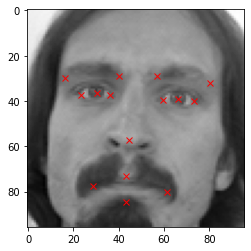

In [29]:
#Brightness decreased image

plt.imshow(df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(df_copy.iloc[0][j-1], df_copy.iloc[0][j], 'rx')

## Data Normalization and Train Test Split

In [57]:
#Gettin the value of images
img = augmented_df['Image']

#Normalizig the image
img = img/255.

#Creating an empty array of shape (4280,96,96,1) to feed the model
X = np.empty((len(img), 96, 96, 1))

#Iterating through the img list and adding image values to the empty array after expanding it's dimension 
#from (96,96) to (96,96,1)

for i in range(len(img)):
    X[i,]= np.expand_dims(img[i], axis = 1)

ValueError: could not broadcast input array from shape (2,1) into shape (96,96,1)